Определять надо параметры:

    Type
    Finish1
    Treatment
    Hanging Method
    Shade Color
    Shade Shape
    Tier
    Style

Product title - можно использовать в помощь и какие-то атрибуты, возможно, определять по нему, а не по изображению.

In [1]:
from __future__ import division, unicode_literals

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed=3
np.random.seed(seed)

In [2]:
train = pd.read_csv('product_attributes_updated.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\n')
train.tail(30)

,ProductID,EID,PID,VID,Department,Category,Type,Product Title,Finish1,Treatment,Hanging Method,Shade Color,Shade Shape,Style1,Style2,Style3,Tier
34306,P994208,435885.0,P994208,14120/1,Wall Lights,Sconces,Sconces,Sconce Wall Light with Clear Glass in Oiled Br...,Bronze / Brown Tones,Oil Rubbed,NaN,Clear,Rectangle,Transitional,Contemporary / Modern,NaN,NaN
34307,P994209,430656.0,P994209,46017/1,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34308,P994210,460029.0,P994210,46017/3,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34309,P994211,431937.0,P994211,46017/3L,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34310,P994212,443578.0,P994212,46017/6RC,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Oval,Transitional,Contemporary / Modern,NaN,NaN
34311,P994213,463528.0,P994213,46018/1,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34312,P994214,429880.0,P994214,46018/3,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34313,P994215,NaN,P994215,46018/3L,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34314,P994216,NaN,P994216,46018/6RC,Ceiling Lights,Mini-Pendant Lights,Multi-Light Pendants,Multi-Light Pendant Light with Clear Glass and...,Chrome,Polished,Cord Hung,Clear,Bowl / Dome,Transitional,Contemporary / Modern,NaN,NaN
34315,P994217,477313.0,P994217,14121/1,Ceiling Lights,Mini-Pendant Lights,Mini-Pendant Lights,Mini-Pendant Light with Clear Glass,Bronze / Brown Tones,Oil Rubbed,Stem Hung,Clear,Rectangle,Transitional,Contemporary / Modern,NaN,NaN


In [3]:
train.describe(include=['O'])

,ProductID,PID,VID,Department,Category,Type,Product Title,Finish1,Treatment,Hanging Method,Shade Color,Shade Shape,Style1,Style2,Style3
count,34336,30855,34336,34336,34336,34281,34334,33594,17883,12570,33343,24480,33422,14283,2252
unique,34336,30850,34328,5,30,80,12659,24,21,5,33,20,26,26,26
top,P694681,P201032,3372,Ceiling Lights,Sconces,Sconces,Modern Bathroom Light with White Glass in Sati...,Bronze / Brown Tones,Satin,Chain Hung,White Tones,Bowl / Dome,Contemporary / Modern,Transitional,Transitional
freq,1,2,2,16216,4249,4231,227,11728,4304,5334,12421,5768,13808,2547,421


In [4]:
len(train)

34336

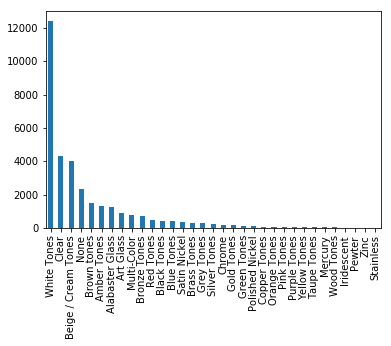

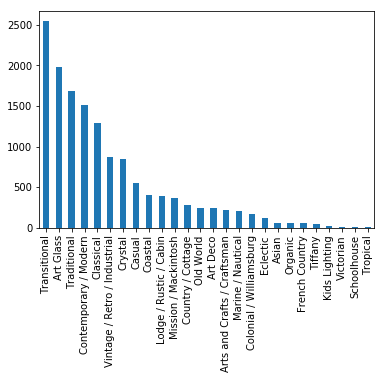

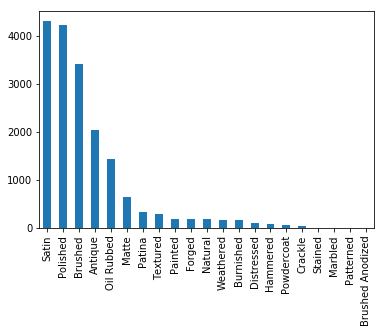

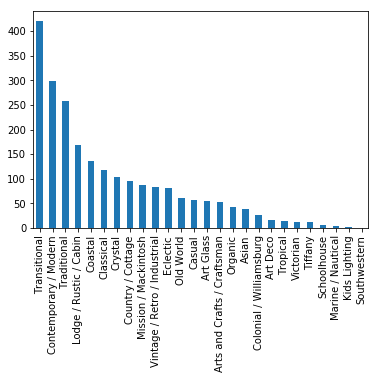

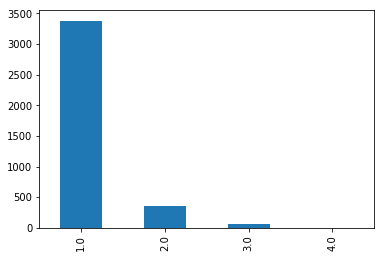

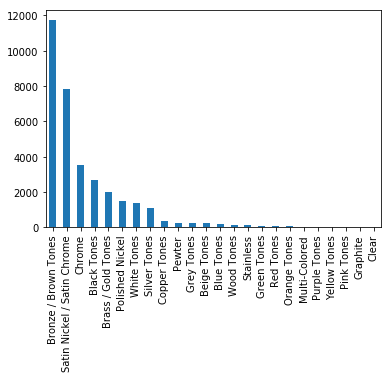

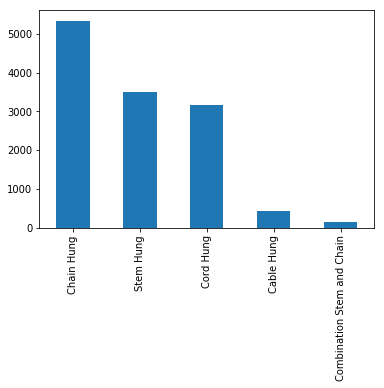

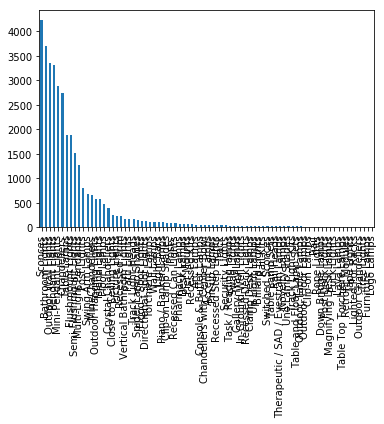

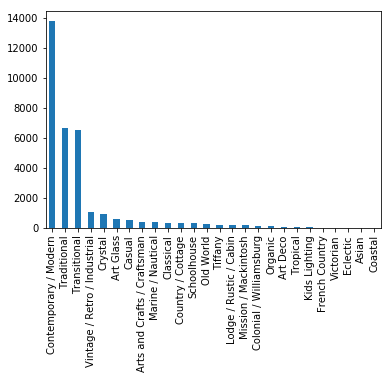

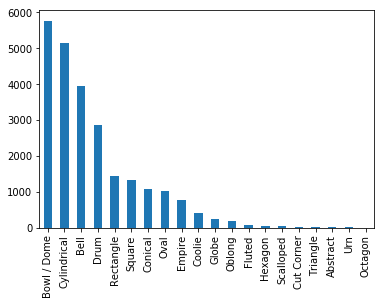

In [5]:
excess_columns=set(["ProductID","EID","PID","VID","Department","Product Title","Category"])
train_researsh_columns=set(train.columns)-excess_columns
for ColumnName in  train_researsh_columns:
    train[ColumnName].value_counts().plot(kind="bar")
    plt.show()

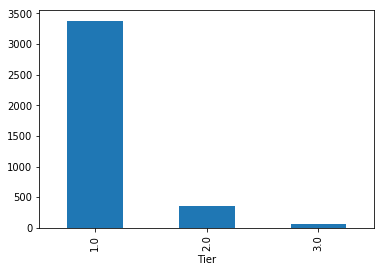

In [6]:
#old_train = train
def delete_rare_records(treshold,column_name):
    global train
    e = train[column_name].value_counts()
    return train[train[column_name].isin(e[e>treshold].index)]
Column=delete_rare_records(treshold=5,column_name='Tier')['Tier'] 
Column.groupby(Column).count().plot(kind="bar")
plt.show()
#print(delete_rare_records(treshold=5,column_name='Tier').columns)

In [37]:
 def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="uint8" )
    return data

x_train_list=[]
y_train_list=[]

one_hot=pd.get_dummies(train['Hanging Method'])

for row in train.itertuples():
    if pd.notnull(row[11]):
        try:
            img = load_image('..\\ml_150x150_m\\'+row[1]+'.jpg')#.reshape(150, 150, 1)
        except IOError:
            continue
        x_train_list.append(img)
        y_train_list.append(one_hot.loc[row[0],:].values)

In [38]:
x_train=np.array(x_train_list)
y_train=np.array(y_train_list)

In [39]:
len(y_train)==len(x_train)
len(x_train)

12570

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras.optimizers import SGD
from keras import backend as K

In [41]:
K.image_data_format()

'channels_last'

In [42]:
x_validation=x_train[10000:]
y_validation=y_train[10000:]
x_train=x_train[:10000]
y_train=y_train[:10000]

In [43]:
epochs = 20
batch_size = 32

input_shape = (150, 150, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5,seed=seed))
model.add(Dense(5))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
metrics=['accuracy'])

In [44]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
activation_21 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        18496     
__________

как мы будем тренировать

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    horizontal_flip=True)

model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_validation,y_validation),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs)



ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (10000, 150, 150))

In [34]:
model.save('hanging_method_classifier.h5')
#model=load_model(filepath)